In [45]:
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import statistics as stat

In [46]:
def resistivity(Rabcd = 1, Rbcda = 1, f = 1):
    thickness = 2
    return (np.pi * thickness * (Rabcd + Rbcda)*f)/ np.log(2)

## Voltage at Reference Frequencies

TODO redo the error bars such that its not from a standard deviation and rather just the min and max we measured.

Text(0, 0.5, 'Voltage ($\\mu$V)')

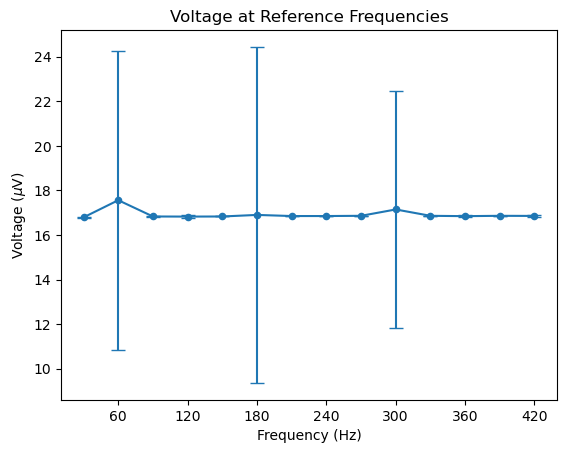

In [47]:
lockinDF = pd.read_csv("LockInAmp.csv")
lockinDF.columns = ['freq','min','max','avg']
std = np.zeros_like(lockinDF['avg'])
avg = np.zeros_like(lockinDF['avg'])
for row in range(len(lockinDF.index)):
    std[row] = stat.stdev([lockinDF.iloc[row]['min'], lockinDF.iloc[row]['max'] ])

lockinDF["stdDev"] = std
refPlot = lockinDF.plot.scatter(x = 'freq', y = 'avg', title = 'Voltage at Reference Frequencies')
plt.errorbar(lockinDF['freq'],lockinDF['avg'], yerr=lockinDF['stdDev'], capsize = 5)


ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(60))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage ($\mu$V)')


## Temperature Dependence

#### $Bi_2Sr_2CaCu_2O_8$

Text(0, 0.5, 'Voltage ($\\mu$V)')

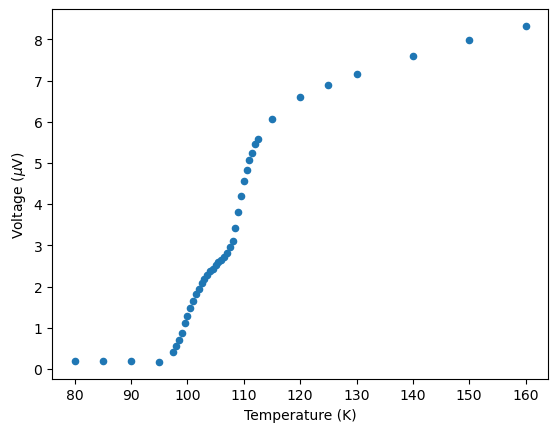

In [48]:
tempBSC = pd.read_csv('volt_temp_BSCCO.csv')
tempBSC.plot.scatter(x = 'temp', y = 'volt') #uV

#plt.errorbar(lockinDF['freq'],lockinDF['avg'], yerr=lockinDF['stdDev'], capsize = 5)


ax = plt.subplot()

ax.xaxis.set_major_locator(plt.MultipleLocator(10))
plt.xlabel('Temperature (K)')
plt.ylabel('Voltage ($\mu$V)')

      temp  vmin  vmax   volt      rmin      rmax  resistance
0    80.00  0.20  0.20  0.200  0.000040  0.000040    0.000040
1    85.00  0.20  0.20  0.200  0.000040  0.000040    0.000040
2    90.00  0.19  0.19  0.190  0.000038  0.000038    0.000038
3    95.00  0.14  0.20  0.170  0.000028  0.000040    0.000034
4    97.50  0.41  0.42  0.415  0.000082  0.000084    0.000083
5    98.00  0.54  0.57  0.555  0.000108  0.000114    0.000111
6    98.50  0.70  0.71  0.705  0.000140  0.000142    0.000141
7    99.00  0.87  0.88  0.875  0.000174  0.000176    0.000175
8    99.52  1.10  1.11  1.105  0.000220  0.000222    0.000221
9   100.00  1.26  1.31  1.285  0.000252  0.000262    0.000257
10  100.50  1.47  1.48  1.475  0.000294  0.000296    0.000295
11  101.00  1.65  1.65  1.650  0.000330  0.000330    0.000330
12  101.50  1.81  1.82  1.815  0.000362  0.000364    0.000363
13  102.00  1.94  1.96  1.950  0.000388  0.000392    0.000390
14  102.50  2.09  2.09  2.090  0.000418  0.000418    0.000418
15  103.

Text(0, 0.5, 'Resistance (m$\\Omega$)')

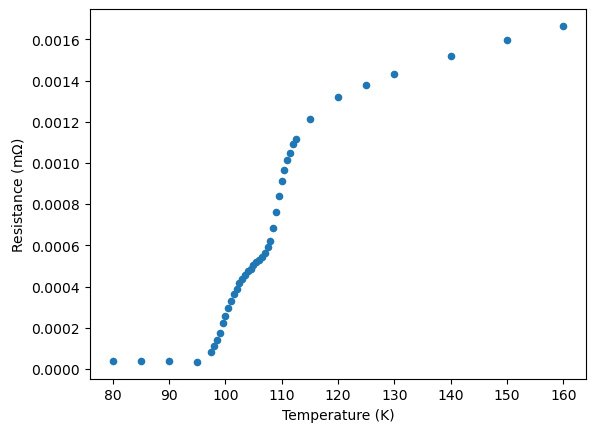

In [49]:
tempBSC = pd.read_csv('volt_temp_BSCCO.csv')
print(tempBSC)
tempBSC.plot.scatter(x = 'temp', y = 'resistance')

#plt.errorbar(lockinDF['freq'],lockinDF['avg'], yerr=lockinDF['stdDev'], capsize = 5)


ax = plt.subplot()
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance (m$\Omega$)')

Text(0, 0.5, 'Resistance (m$\\Omega$)')

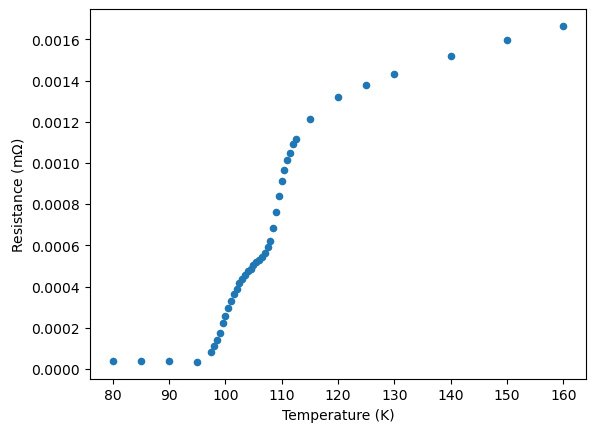

In [50]:
tempBSC = pd.read_csv('volt_temp_BSCCO.csv')
resistivity()
tempBSC.plot.scatter(x = 'temp', y = 'resistance')

#plt.errorbar(lockinDF['freq'],lockinDF['avg'], yerr=lockinDF['stdDev'], capsize = 5)


ax = plt.subplot()
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance (m$\Omega$)')

In [51]:
print(tempBSC)

      temp  vmin  vmax   volt      rmin      rmax  resistance
0    80.00  0.20  0.20  0.200  0.000040  0.000040    0.000040
1    85.00  0.20  0.20  0.200  0.000040  0.000040    0.000040
2    90.00  0.19  0.19  0.190  0.000038  0.000038    0.000038
3    95.00  0.14  0.20  0.170  0.000028  0.000040    0.000034
4    97.50  0.41  0.42  0.415  0.000082  0.000084    0.000083
5    98.00  0.54  0.57  0.555  0.000108  0.000114    0.000111
6    98.50  0.70  0.71  0.705  0.000140  0.000142    0.000141
7    99.00  0.87  0.88  0.875  0.000174  0.000176    0.000175
8    99.52  1.10  1.11  1.105  0.000220  0.000222    0.000221
9   100.00  1.26  1.31  1.285  0.000252  0.000262    0.000257
10  100.50  1.47  1.48  1.475  0.000294  0.000296    0.000295
11  101.00  1.65  1.65  1.650  0.000330  0.000330    0.000330
12  101.50  1.81  1.82  1.815  0.000362  0.000364    0.000363
13  102.00  1.94  1.96  1.950  0.000388  0.000392    0.000390
14  102.50  2.09  2.09  2.090  0.000418  0.000418    0.000418
15  103.

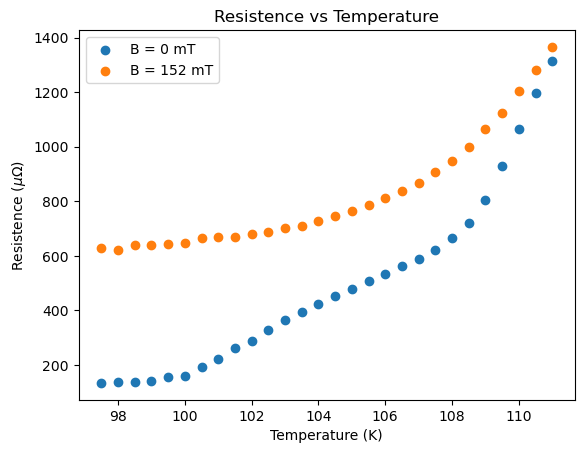

In [52]:
magdf = pd.read_csv("mag.csv")
#print(magdf)

#zeroPlot = magdf.plot.scatter(x = 'temp', y = 'resistivity0', title = 'Voltage at Reference Frequencies')
#plt.subplot(magdf.plot.scatter(x = 'temp', y = 'resistivity8'))
plt.scatter( x = magdf['temp'], y =magdf['res0'], label = "B = 0 mT")
plt.scatter( x = magdf['temp'], y =magdf['res8'], label = "B = 152 mT")

#magdf.plot.scatter(ax =[0,3])
#magdf.plot.scatter(ax = [0,4])

plt.title('Resistence vs Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Resistence ($\mu \Omega$)')
plt.legend()


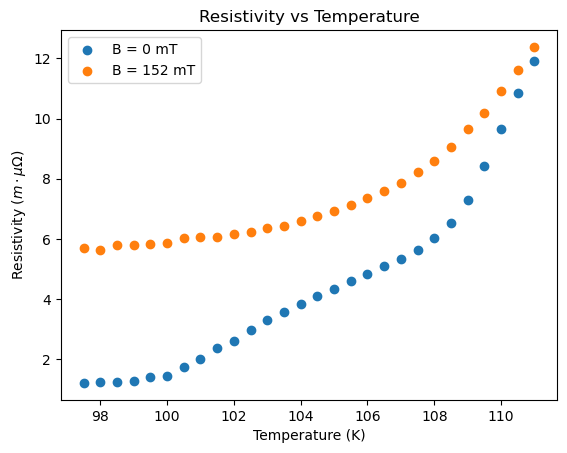

In [53]:
magdf = pd.read_csv("mag.csv")
plt.scatter( x = magdf['temp'], y =magdf['resistivity0'], label = "B = 0 mT")
plt.scatter( x = magdf['temp'], y =magdf['resistivity8'], label = "B = 152 mT")

plt.title('Resistivity vs Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Resistivity ($m\cdot\mu \Omega$)')
plt.legend()

Why the offset? I believe part of it is that we didn't measure low enough temperatures. Besides the human error the applied magnetic field interrupts the formation of cooper pairs therefore we need to reach lower temperatures to truly be in the super conducting regime. This is effectively like shifting the curve to the left. 